# Life Expectation

---

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
from pandas import DataFrame as df

%matplotlib inline

## Load Data

In [2]:
df=pd.read_csv("../Datasets/wiki_life_expentancy.csv", sep=';')
df['Entity'] = df['Entity'].str.strip()
df.sample(3)

,Rank,Entity,Overall life expectancy at birth,Male life expectancy at birth,Female life expectancy at birth
83,84,People's Republic of China,76.7,74.6,79.0
164,164,Guyana,68.6,65.6,71.8
138,138,Trinidad and Tobago,73.1,70.2,76.2


In [3]:
df1=pd.read_csv("../Datasets/wiki_EU_life_expentancy.csv", sep=';')
df1['Country'] = df1['Country'].str.strip()
df1.head(3)

,Country,Life expectancy
0,Monaco,89.4
1,San Marino,83.4
2,Switzerland,83.0


In [4]:
mer = pd.merge(df, df1, how = 'inner', left_on = 'Entity', right_on = 'Country')
mer.drop(columns=['Rank','Entity','Overall life expectancy at birth',
                  'Life expectancy'], inplace=True)
mer.rename(columns={'Male life expectancy at birth':'male',
                   'Female life expectancy at birth': 'female'}, inplace=True)
mer.head(3)

,male,female,Country
0,85.6,93.5,Monaco
1,80.8,86.1,San Marino
2,80.9,85.4,Iceland


In [5]:
mer.set_index('Country',inplace=True)
mer = mer.stack().reset_index()

In [6]:
mer.rename(columns = {0:'new'}, inplace = True)

## Statistical Info

In [7]:
mer.describe()

,new
count,88.000000
mean,78.751136
std,5.191593
min,65.300000
25%,75.950000
50%,79.250000
75%,82.375000
max,93.500000


## Tabular Presentation

## Visual Presentation

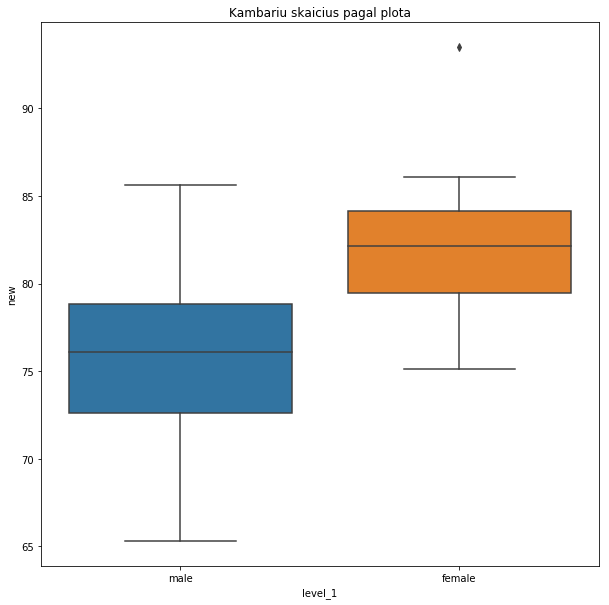

In [8]:
plt.figure(figsize = [10, 10]) 
sb.boxplot(data = mer, x = 'level_1', y = 'new')
plt.title ('Kambariu skaicius pagal plota');

In [13]:
# save clean dataframe
mer.to_csv('../Datasets/expectation.csv', sep = ';')